<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,0.040214,157.479304,157.441416,0.037888
1,0.0,1.0,95.145814,36.678058,32.755933,0.172188,174.751993,174.518875,0.233118
2,0.0,2.0,60.443735,47.585077,69.899609,0.221711,188.150132,187.904222,0.245910
3,0.0,3.0,31.749471,39.444064,81.196086,-0.216651,162.172970,162.385010,-0.212041
4,0.0,4.0,75.571924,28.101242,59.999407,0.088393,173.760965,173.626361,0.134604
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-0.354028,157.896408,158.257624,-0.361216
59996,999.0,56.0,64.963417,65.855822,20.013285,0.324358,161.156882,160.850682,0.306200
59997,999.0,57.0,28.983831,65.042478,32.769278,-0.224001,136.571586,136.813914,-0.242328
59998,999.0,58.0,92.143225,62.373276,34.331948,0.130183,198.978632,198.857329,0.121302


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,0.040214,157.479304,157.441416,0.037888
1,0.0,1.0,95.145814,36.678058,32.755933,0.172188,174.751993,174.518875,0.233118
2,0.0,2.0,60.443735,47.585077,69.899609,0.221711,188.150132,187.904222,0.245910
3,0.0,3.0,31.749471,39.444064,81.196086,-0.216651,162.172970,162.385010,-0.212041
4,0.0,4.0,75.571924,28.101242,59.999407,0.088393,173.760965,173.626361,0.134604
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-0.354028,157.896408,158.257624,-0.361216
59996,999.0,56.0,64.963417,65.855822,20.013285,0.324358,161.156882,160.850682,0.306200
59997,999.0,57.0,28.983831,65.042478,32.769278,-0.224001,136.571586,136.813914,-0.242328
59998,999.0,58.0,92.143225,62.373276,34.331948,0.130183,198.978632,198.857329,0.121302


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.640995  34.925259  90.872835  0.040214  157.479304   
      1.0    95.145814  36.678058  32.755933  0.172188  174.751993   
      2.0    60.443735  47.585077  69.899609  0.221711  188.150132   
      3.0    31.749471  39.444064  81.196086 -0.216651  162.172970   
      4.0    75.571924  28.101242  59.999407  0.088393  173.760965   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.655950  26.943522  93.650964 -0.354028  157.896408   
      56.0   64.963417  65.855822  20.013285  0.324358  161.156882   
      57.0   28.983831  65.042478  32.769278 -0.224001  136.571586   
      58.0   92.143225  62.373276  34.331948  0.130183  198.978632   
      59.0   23.025996  28.855452  24.490296 -0.128278   86.243466   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    157.441416  0.037888  
      1.0    174.518875  0.233118  
      2.0    187.904222  0.245910  
      3.0    162.385010 -0.212041  
      4.0    173.626361  0.134604  
...                 ...       ...  
999.0 55.0   158.257624 -0.361216  
      56.0   160.850682  0.306200  
      57.0   136.813914 -0.242328  
      58.0   198.857329  0.121302  
      59.0    86.410341 -0.166875  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.640995  34.925259  90.872835  0.040214  157.479304   
      1.0    95.145814  36.678058  32.755933  0.172188  174.751993   
      2.0    60.443735  47.585077  69.899609  0.221711  188.150132   
      3.0    31.749471  39.444064  81.196086 -0.216651  162.172970   
      4.0    75.571924  28.101242  59.999407  0.088393  173.760965   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.655950  26.943522  93.650964 -0.354028  157.896408   
      56.0   64.963417  65.855822  20.013285  0.324358  161.156882   
      57.0   28.983831  65.042478  32.769278 -0.224001  136.571586   
      58.0   92.143225  62.373276  34.331948  0.130183  198.978632   
      59.0   23.025996  28.855452  24.490296 -0.128278   86.243466   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    157.441416  0.037888  
      1.0    174.518875  0.233118  
      2.0    187.904222  0.245910  
      3.0    162.385010 -0.212041  
      4.0    173.626361  0.134604  
...                 ...       ...  
999.0 55.0   158.257624 -0.361216  
      56.0   160.850682  0.306200  
      57.0   136.813914 -0.242328  
      58.0   198.857329  0.121302  
      59.0    86.410341 -0.166875  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,21.640995,34.925259,90.872835,0.040214,157.479304,157.441416,0.037888
1,0.0,1.0,95.145814,36.678058,32.755933,0.172188,174.751993,174.518875,0.233118
2,0.0,2.0,60.443735,47.585077,69.899609,0.221711,188.150132,187.904222,0.245910
3,0.0,3.0,31.749471,39.444064,81.196086,-0.216651,162.172970,162.385010,-0.212041
4,0.0,4.0,75.571924,28.101242,59.999407,0.088393,173.760965,173.626361,0.134604
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,27.655950,26.943522,93.650964,-0.354028,157.896408,158.257624,-0.361216
59996,999.0,56.0,64.963417,65.855822,20.013285,0.324358,161.156882,160.850682,0.306200
59997,999.0,57.0,28.983831,65.042478,32.769278,-0.224001,136.571586,136.813914,-0.242328
59998,999.0,58.0,92.143225,62.373276,34.331948,0.130183,198.978632,198.857329,0.121302


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    21.640995  34.925259  90.872835  0.040214  157.479304   
      1.0    95.145814  36.678058  32.755933  0.172188  174.751993   
      2.0    60.443735  47.585077  69.899609  0.221711  188.150132   
      3.0    31.749471  39.444064  81.196086 -0.216651  162.172970   
      4.0    75.571924  28.101242  59.999407  0.088393  173.760965   
...                ...        ...        ...       ...         ...   
999.0 55.0   27.655950  26.943522  93.650964 -0.354028  157.896408   
      56.0   64.963417  65.855822  20.013285  0.324358  161.156882   
      57.0   28.983831  65.042478  32.769278 -0.224001  136.571586   
      58.0   92.143225  62.373276  34.331948  0.130183  198.978632   
      59.0   23.025996  28.855452  24.490296 -0.128278   86.243466   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    157.441416  0.037888  
      1.0    174.518875  0.233118  
      2.0    187.904222  0.245910  
      3.0    162.385010 -0.212041  
      4.0    173.626361  0.134604  
...                 ...       ...  
999.0 55.0   158.257624 -0.361216  
      56.0   160.850682  0.306200  
      57.0   136.813914 -0.242328  
      58.0   198.857329  0.121302  
      59.0    86.410341 -0.166875  

[60000 rows x 7 columns]

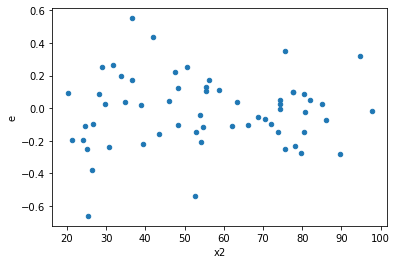

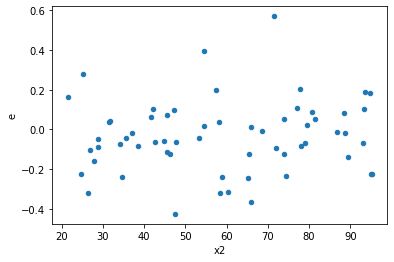

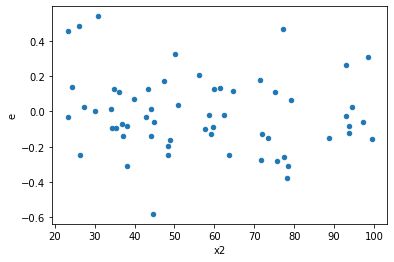

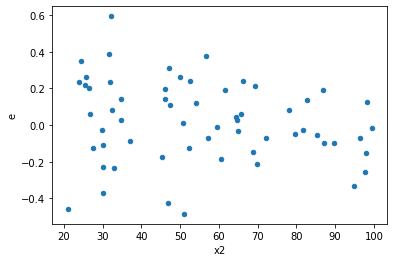

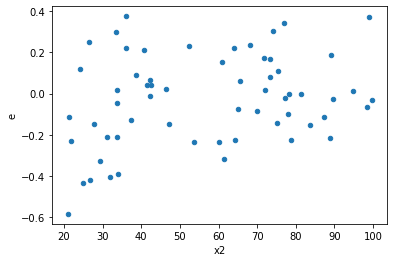

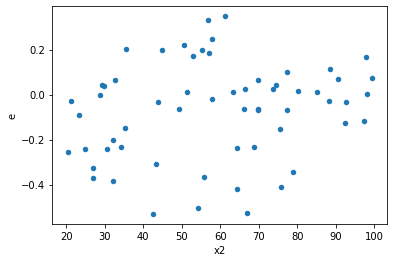

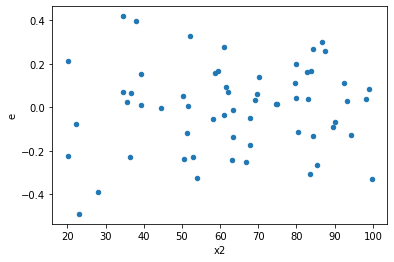

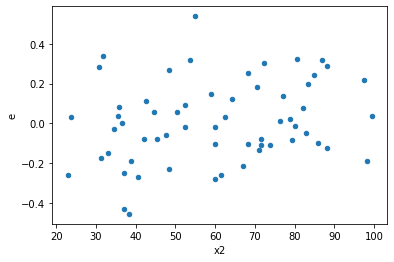

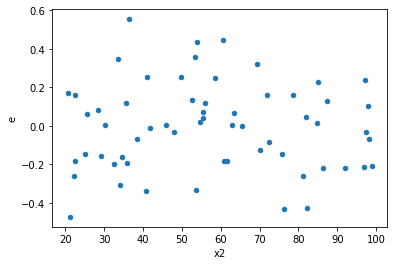

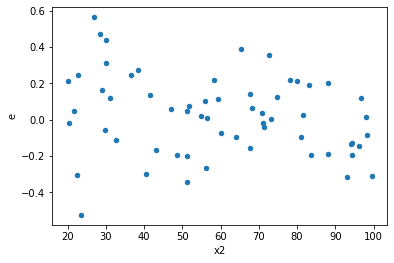

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,21.0,21.0,0.5390331811893893,1.1305506625883177,0.02566824672330425,0.05383574583753894,2.0973674757715868,0.09718242070853678,0.9514087896457316,0.04859121035426839,Reject001=1 : Homoscedasticity
13.0,21.0,21.0,0.7992677613509852,0.8284404604088436,0.03806036958814215,0.039449545733754456,1.0364992815530911,0.9353095880637778,0.5323452059681111,0.4676547940318889,Reject001=1 : Homoscedasticity
21.0,21.0,21.0,0.8996935204341067,1.3173958297727175,0.042842548592100314,0.06273313475108179,1.464271776834702,0.3892926992530119,0.805353650373494,0.19464634962650595,Reject001=1 : Homoscedasticity
26.0,21.0,21.0,0.6831569138264179,0.7984973314983829,0.0325312816107818,0.03802368245230395,1.168834443943389,0.7240496427952947,0.6379751786023526,0.36202482139764736,Reject001=1 : Homoscedasticity
27.0,21.0,21.0,0.6871435069623613,0.7654283808929392,0.03272111937916006,0.03644897051871139,1.1139279832194735,0.8070528423313899,0.5964735788343051,0.4035264211656949,Reject001=1 : Homoscedasticity
34.0,21.0,21.0,0.8854398158978846,0.9885763568611273,0.042163800757042125,0.04707506461243464,1.1164805773486215,0.8030448077073329,0.5984775961463336,0.40152240385366644,Reject001=1 : Homoscedasticity
38.0,21.0,21.0,0.777872702147929,0.8397663114820728,0.03704155724513948,0.0399888719753368,1.0795677868155518,0.8623946873251311,0.5688026563374344,0.43119734366256557,Reject001=1 : Homoscedasticity
41.0,21.0,21.0,0.627282172889369,1.607938814901474,0.029870579661398527,0.07656851499530828,2.563342120014399,0.036236746736236114,0.9818816266318819,0.018118373368118057,Reject001=1 : Homoscedasticity
47.0,21.0,21.0,0.5448440702659729,0.7614374109678257,0.025944955726951092,0.03625892433180122,1.397532711691475,0.4495865832166279,0.775206708391686,0.22479329160831396,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1.0931077955557182,0.9284445199663391,0.05205275216931991,0.04421164380792091,0.849362271261027,0.711777874661674,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,0.45466107786997456,0.41573863049471493,0.021650527517617837,0.019797077642605472,0.9143923918941862,0.8394471200632548,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,0.5390331811893893,1.1305506625883177,0.02566824672330425,0.05383574583753894,2.0973674757715868,0.09718242070853678,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,1.2198969882690323,0.7384687312755818,0.05809033277471582,0.035165177679789605,0.6053533522723331,0.25818992549551695,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,1.364362383410347,0.6246716139013385,0.06496963730525462,0.029746267328635168,0.45784875154642957,0.080579867532076,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,0.9992366251371193,0.742080688926783,0.04758269643510092,0.03533717566318014,0.7426476074422829,0.5012977798968681,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,1.1100797413410028,0.6379295263820842,0.052860940063857276,0.030377596494384963,0.5746700012842773,0.21258909716516314,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,0.7681834870701018,0.7267272353954024,0.03658016605095723,0.03460605882835249,0.9460333990869602,0.9000461767135687,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,1.237329546644793,1.0384500151267702,0.05892045460213301,0.049450000720322386,0.8392671281007432,0.6917407006050237,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      949
Reject001=0 : Heteroscedasticity     51
Name: Result_test, dtype: int64